In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import ipywidgets as widgets
from IPython.display import display
from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Fibovin/des_modelos_1/refs/heads/main/Student_Performance.csv')
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


<Figure size 1000x600 with 0 Axes>

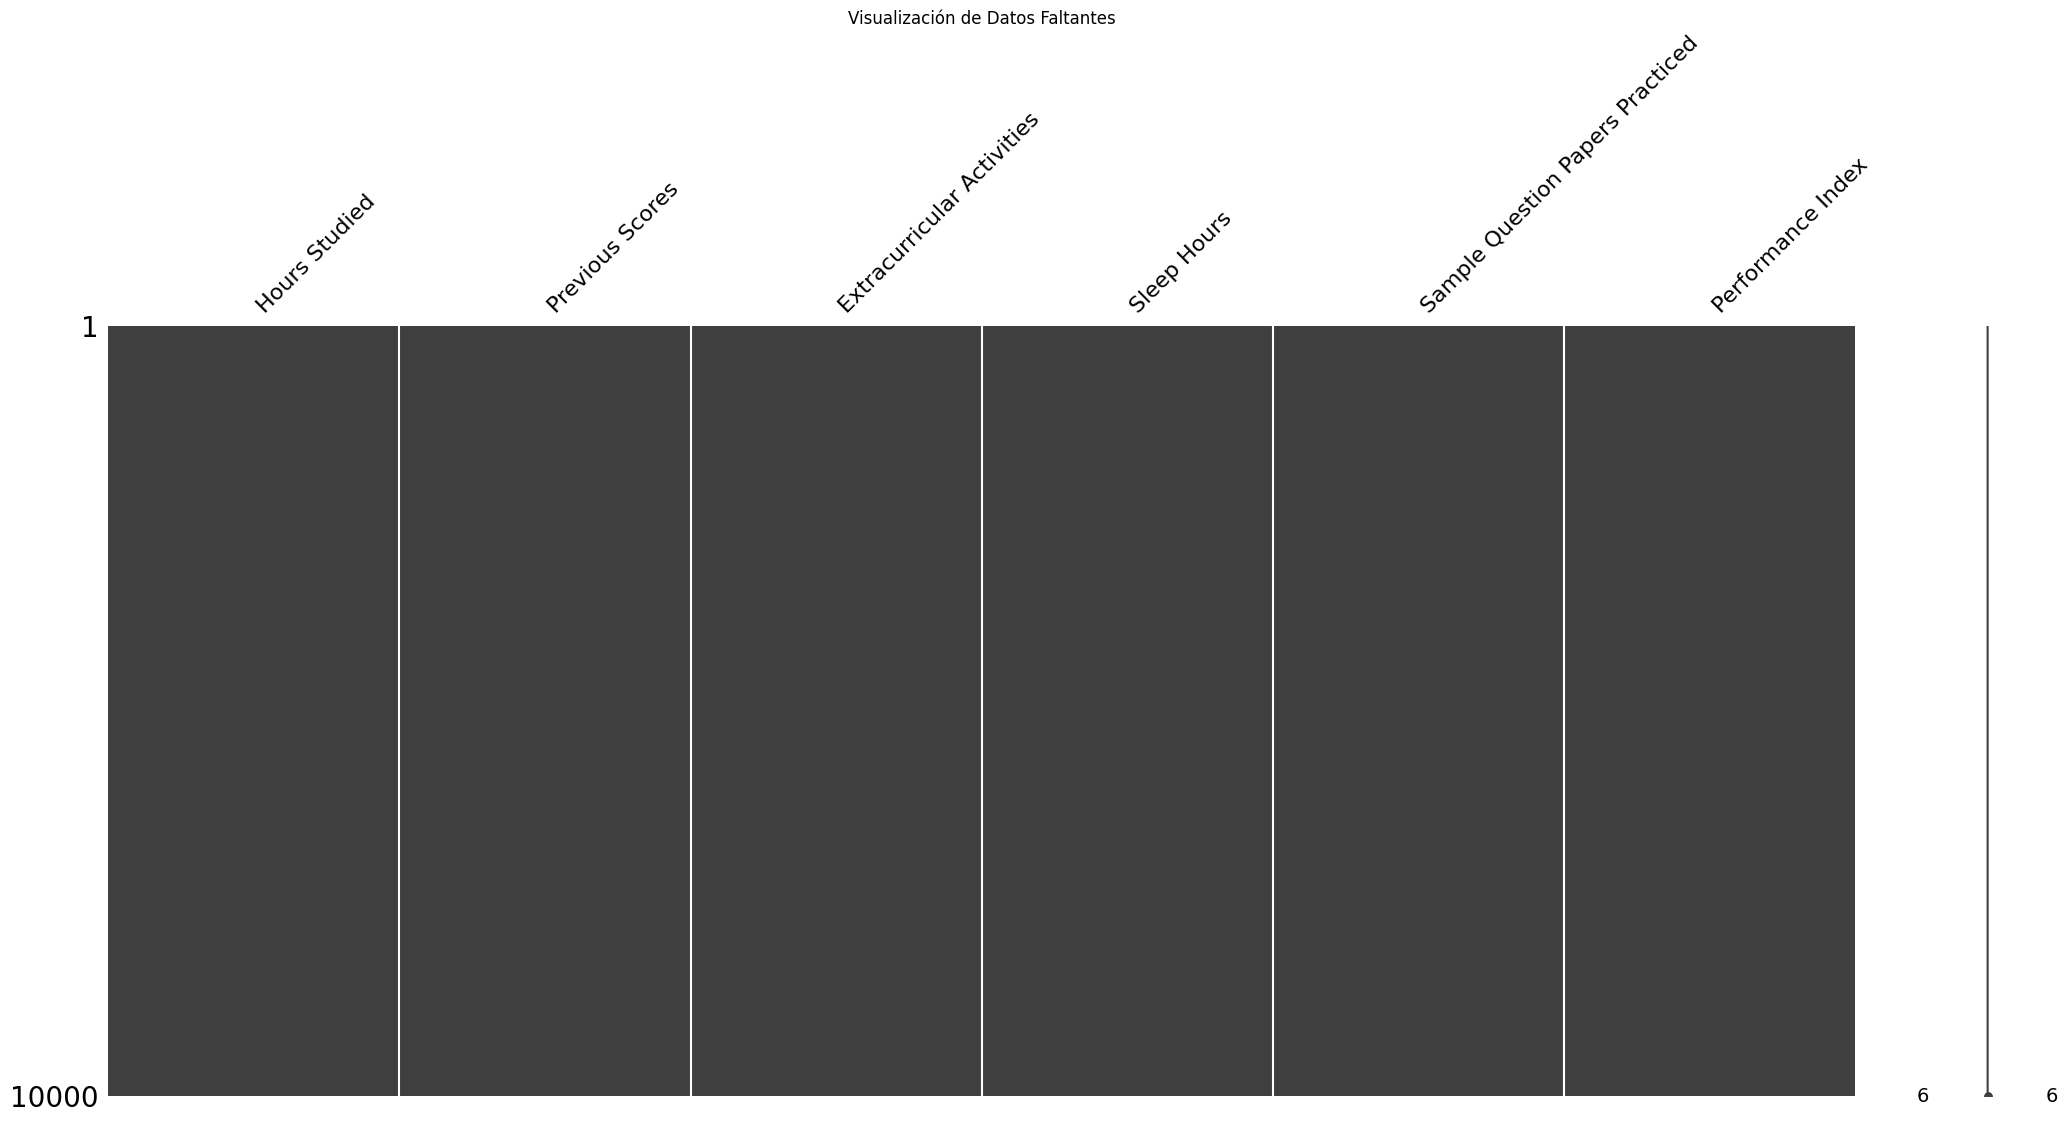

In [3]:
plt.figure(figsize=(10, 6)) #Datos faltantes
msno.matrix(df)
plt.title('Visualización de Datos Faltantes')
plt.show()

### **Medidas de tendencia central**

In [4]:
descriptivo = df.describe().T  #análisis de tendencia central de los datos
descriptivo1 = tabulate(descriptivo, headers='keys', tablefmt='pretty', floatfmt=".2f")
print(descriptivo1)


+----------------------------------+---------+---------+--------------------+------+------+------+------+-------+
|                                  |  count  |  mean   |        std         | min  | 25%  | 50%  | 75%  |  max  |
+----------------------------------+---------+---------+--------------------+------+------+------+------+-------+
|          Hours Studied           | 10000.0 | 4.9929  | 2.5893087961856156 | 1.0  | 3.0  | 5.0  | 7.0  |  9.0  |
|         Previous Scores          | 10000.0 | 69.4457 | 17.343152251047105 | 40.0 | 54.0 | 69.0 | 85.0 | 99.0  |
|           Sleep Hours            | 10000.0 | 6.5306  | 1.6958629765177113 | 4.0  | 5.0  | 7.0  | 8.0  |  9.0  |
| Sample Question Papers Practiced | 10000.0 | 4.5833  | 2.867347777708144  | 0.0  | 2.0  | 5.0  | 7.0  |  9.0  |
|        Performance Index         | 10000.0 | 55.2248 | 19.212557799463344 | 10.0 | 40.0 | 55.0 | 71.0 | 100.0 |
+----------------------------------+---------+---------+--------------------+------+----

### **Análisis de distribuciones**

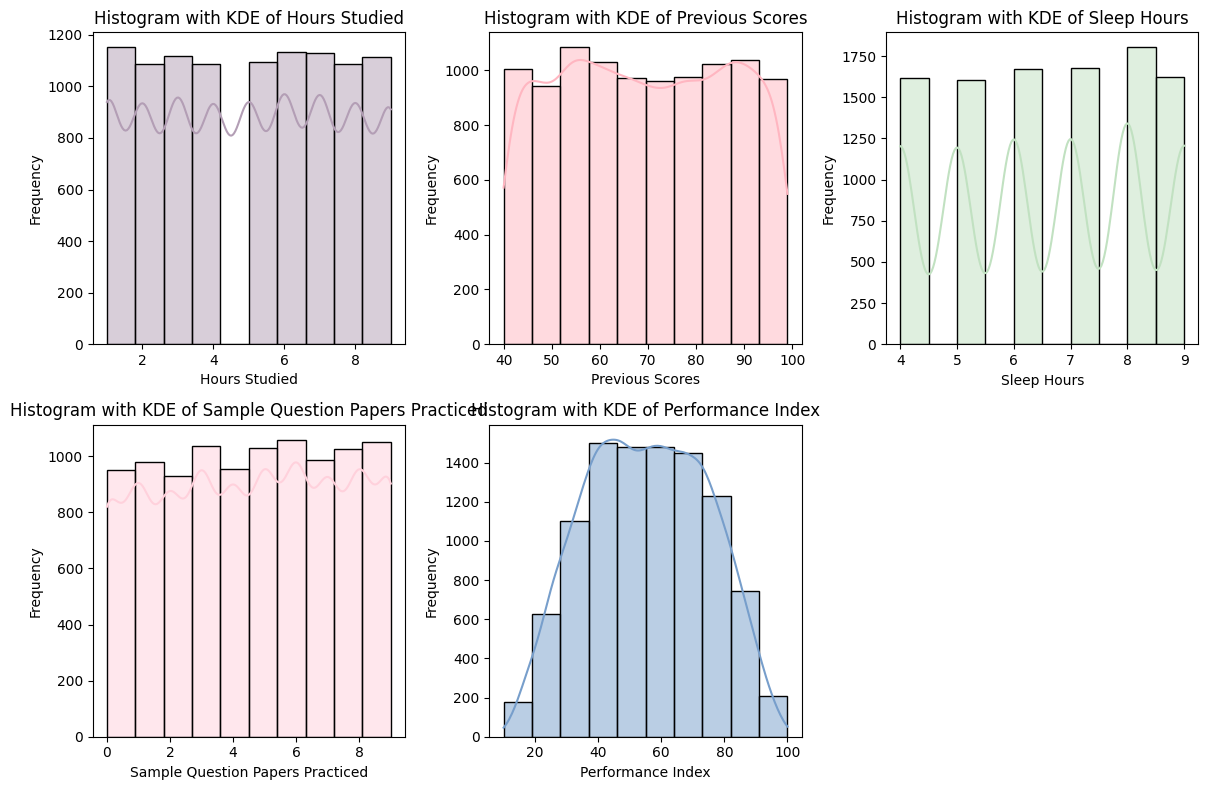

In [5]:
#Calculamos la densidad y y graficamos los histogramas
colores = ['#B39EB5', '#FFB6C1', '#C1E1C1', '#FFD1DC', '#779ECB']
plt.figure(figsize=(12, 8))
for i, (column, color) in enumerate(zip(df.select_dtypes(include='number').columns, colores), 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], bins=10, kde=True, color=color, edgecolor='black')
    plt.title(f'Histogram with KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### **Análisis de diagramas de cajas**

C:\Users\jonig\AppData\Local\Temp\ipykernel_6900\1130975469.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Extracurricular Activities', y=column, data=df, palette=colores[:2])
C:\Users\jonig\AppData\Local\Temp\ipykernel_6900\1130975469.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Extracurricular Activities', y=column, data=df, palette=colores[:2])
C:\Users\jonig\AppData\Local\Temp\ipykernel_6900\1130975469.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Extracurricular Activities', y=column, data=df, palette=colores[

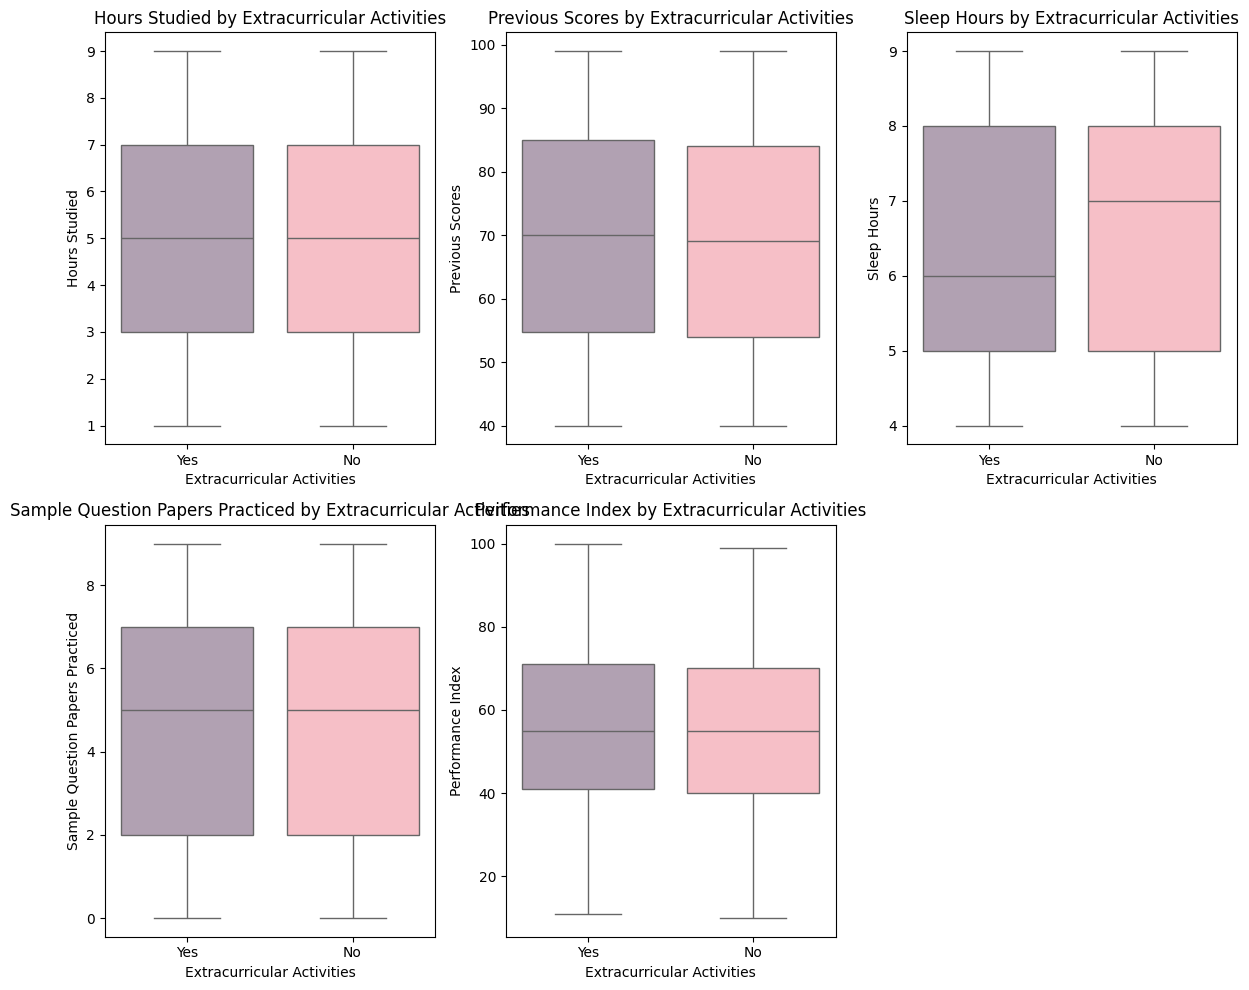

In [6]:
plt.figure(figsize=(12, 10))

for i, (column, color) in enumerate(zip(df.select_dtypes(include='number').columns, colores), 1): #Creamos los graficos de cajas por cada variables
    plt.subplot(2, 3, i)
    sns.boxplot(x='Extracurricular Activities', y=column, data=df, palette=colores[:2])
    plt.title(f'{column} by Extracurricular Activities')
    plt.xlabel('Extracurricular Activities')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

En estos gráficos, podemos ver cómo los estudiantes que participan en actividades extracurriculares tienden a estudiar un poco más de horas, aunque la diferencia no es enorme. Sus puntajes previos también son ligeramente más altos en comparación con aquellos que no participan en dichas actividades. En cuanto a las horas de sueño, ambos grupos muestran una distribución similar, con una mediana alrededor de las 7 horas. Al ver la cantidad de exámenes de práctica realizados, nuevamente hay una ligera diferencia a favor de los que participan en actividades extracurriculares. Finalmente, en el Performance Index, el grupo que realiza actividades extracurriculares parece tener un rendimiento algo mejor en promedio, aunque ambos grupos tienen una variabilidad considerable.

### **Análisis de correlación**

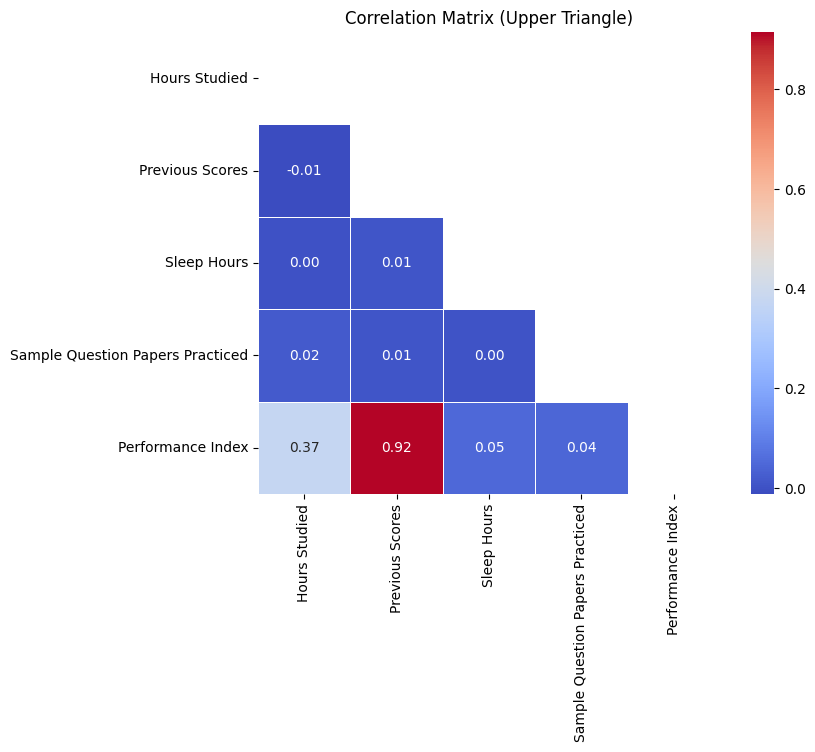

In [7]:
correlation_matrix = df.select_dtypes(include='number').corr() #variables númericas para poder interpretar la correlación de variables
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True, linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix (Upper Triangle)')
plt.show()

En esta matriz de correlación, podemos ver que Previous Scores y Performance Index tienen una relación bastante fuerte, con una correlación de 0.92, lo que muestra que los puntajes previos están muy relacionados con el rendimiento actual. Hours Studied también tiene una correlación positiva con Performance Index, aunque es más moderada (0.37), indicando que estudiar más horas podría ayudar a mejorar el rendimiento, pero no de forma tan directa como los puntajes previos. Las demás variables, como Sleep Hours y Sample Question Papers Practiced, muestran correlaciones muy bajas con el Performance Index, lo que sugiere que no tienen una relación significativa con el rendimiento de los estudiantes en este conjunto de datos.

### **Análisis de relación**

<Figure size 1000x600 with 0 Axes>

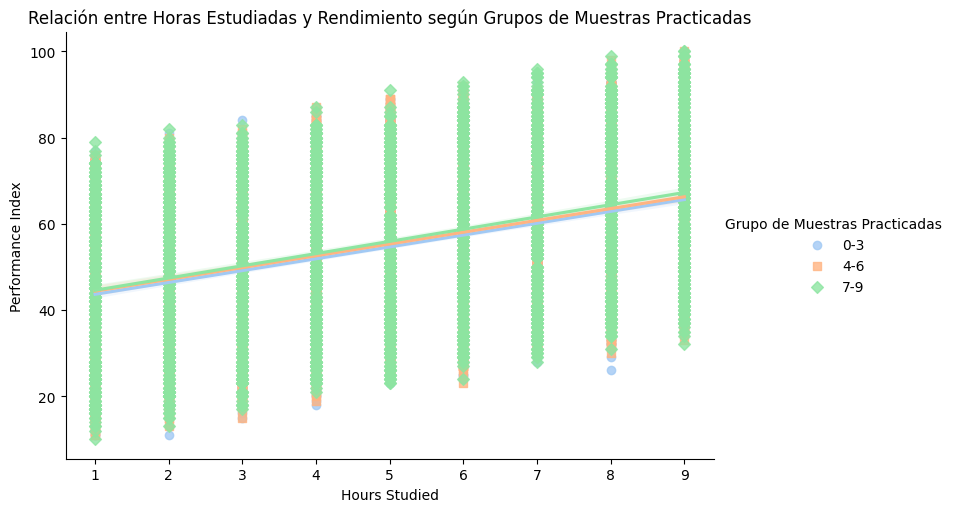

In [8]:
df['Grupo de Muestras Practicadas'] = pd.cut(df['Sample Question Papers Practiced'], bins=[-1, 3, 6, 9], labels=['0-3', '4-6', '7-9']) # Agrupamos 'Sample Question Papers Practiced' en intervalos de 3 para simplificar el gráfico
plt.figure(figsize=(10, 6))
sns.lmplot(x='Hours Studied', y='Performance Index', hue='Grupo de Muestras Practicadas', data=df, aspect=1.5, palette="pastel", markers=["o", "s", "D"])
plt.title('Relación entre Horas Estudiadas y Rendimiento según Grupos de Muestras Practicadas')
plt.show()

En este gráfico, vemos cómo el rendimiento (Performance Index) se relaciona con las horas estudiadas (Hours Studied), desglosado por grupos de muestras practicadas (Grupo de Muestras Practicadas). La línea de tendencia muestra una ligera inclinación positiva, lo que indica que a medida que los estudiantes aumentan sus horas de estudio, su rendimiento tiende a mejorar, aunque la relación no es muy pronunciada. Los colores representan distintos grupos de cantidad de muestras de exámenes practicados, y parece que no hay una diferencia clara en el rendimiento entre los distintos grupos de prácticas. Esto quiere decir que, en este caso, el número de muestras practicadas no tiene un efecto significativo sobre el rendimiento cuando se controla por las horas estudiadas.

### **Análisis de densidad**

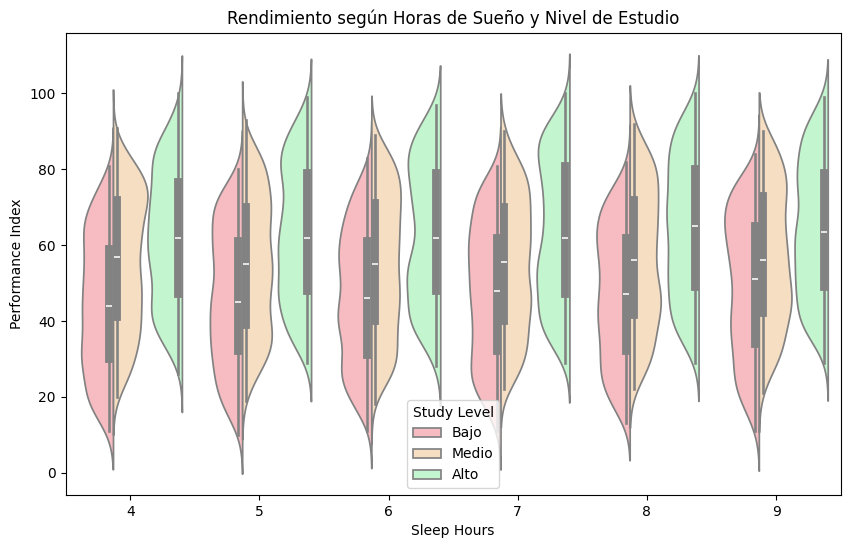

In [9]:
df['Study Level'] = pd.cut(df['Hours Studied'], bins=[0, 3, 6, 10], labels=['Bajo', 'Medio', 'Alto']) #Clasificamos de las horas estudiadas en tres grupos: bajas, medias, altas

custom_palette = ["#FFB3BA", "#FFDFBA", "#Baffc9"]
plt.figure(figsize=(10, 6))
sns.violinplot(x='Sleep Hours', y='Performance Index', hue='Study Level', data=df, palette=custom_palette, split=True)
plt.title('Rendimiento según Horas de Sueño y Nivel de Estudio')
plt.show()

En este gráfico de violín, se muestra la relación entre las horas de sueño (Sleep Hours), el rendimiento (Performance Index), y el nivel de estudio (Study Level). Los estudiantes con un nivel de estudio alto tienden a tener un rendimiento más elevado en comparación con los niveles medio y bajo, independientemente de la cantidad de horas de sueño. Aunque hay variabilidad en todos los niveles de estudio, los que duermen entre 6 y 8 horas y tienen un nivel de estudio alto parecen obtener los mejores resultados de rendimiento. No se observa una relación clara entre el rendimiento y las horas de sueño en sí, lo que sugiere que el nivel de estudio es un factor más determinante en el rendimiento que el sueño.

## Análisis de relaciones entre variables académicas y rendimiento estudiantil

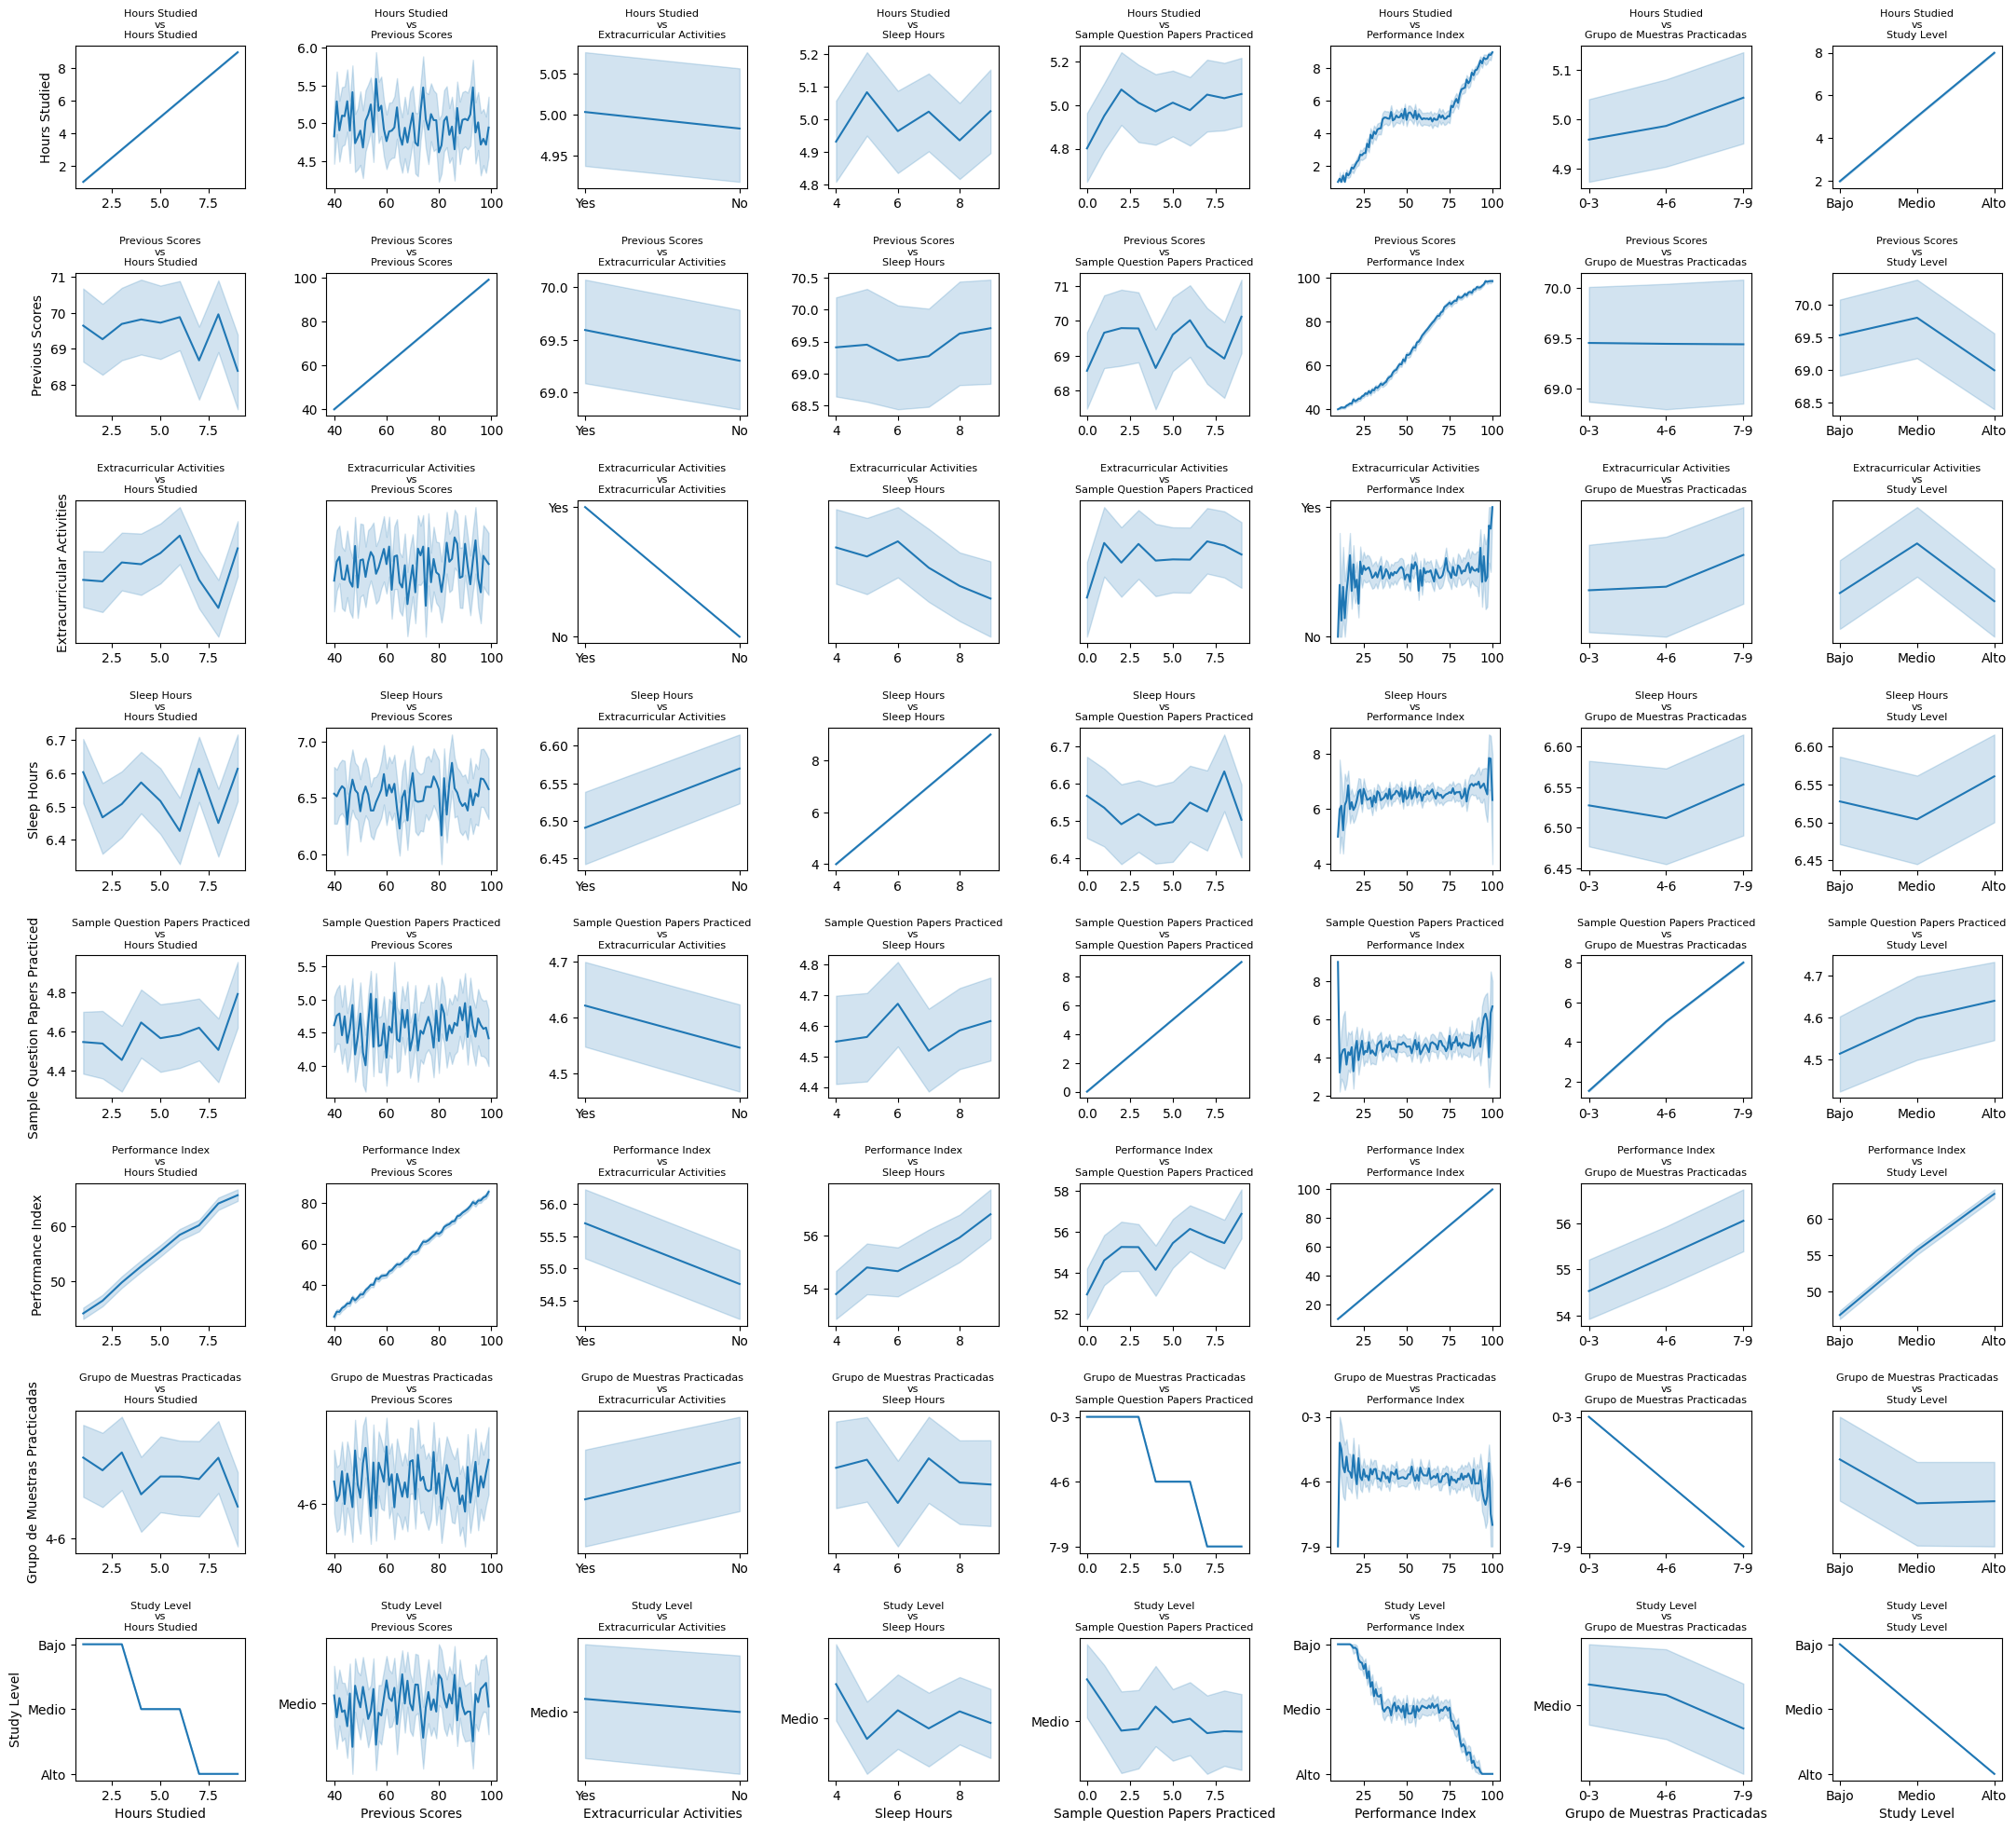

In [10]:
rows, cols = df.shape[1], df.shape[1]  # Definimos las dimensiones del grid para los subplots
fig, axes = plt.subplots(rows, cols, figsize=(22, 20))

#Iteramos las columnas
for ind_x, column_x in enumerate(df.columns):
    for ind_y, column_y in enumerate(df.columns):
        sns.lineplot(x=df[column_y], y=df[column_x], ax=axes[ind_x, ind_y])

        axes[ind_x, ind_y].set_title(f'{column_x}\nvs\n{column_y}', fontsize=8)

        if ind_x == df.shape[1] - 1:
            axes[ind_x, ind_y].set_xlabel(column_y)
        else:
            axes[ind_x, ind_y].set_xlabel('')

        if ind_y == 0:
            axes[ind_x, ind_y].set_ylabel(column_x)
        else:
            axes[ind_x, ind_y].set_ylabel('')

# Ajustamos el espacio entre subplots
plt.tight_layout(pad=2.0, h_pad=2.0, w_pad=2.0)
plt.show()

En este análisis de relaciones entre variables académicas y rendimiento estudiantil, vemos que las horas de estudio y los puntajes previos tienen una conexión moderada con el Performance Index, lo que indica que estos factores influyen en el rendimiento. Los estudiantes con puntajes previos altos tienden a mantener buenos resultados, mientras que más horas de estudio también se asocian con un mejor rendimiento. Las actividades extracurriculares y las horas de sueño muestran menos influencia directa, pero podrían tener efectos en combinación con otros factores, como el nivel de estudio. En general, el rendimiento parece estar más ligado a la preparación académica previa y a los hábitos de estudio constantes.

C:\Users\jonig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\jonig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\jonig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\jonig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: 

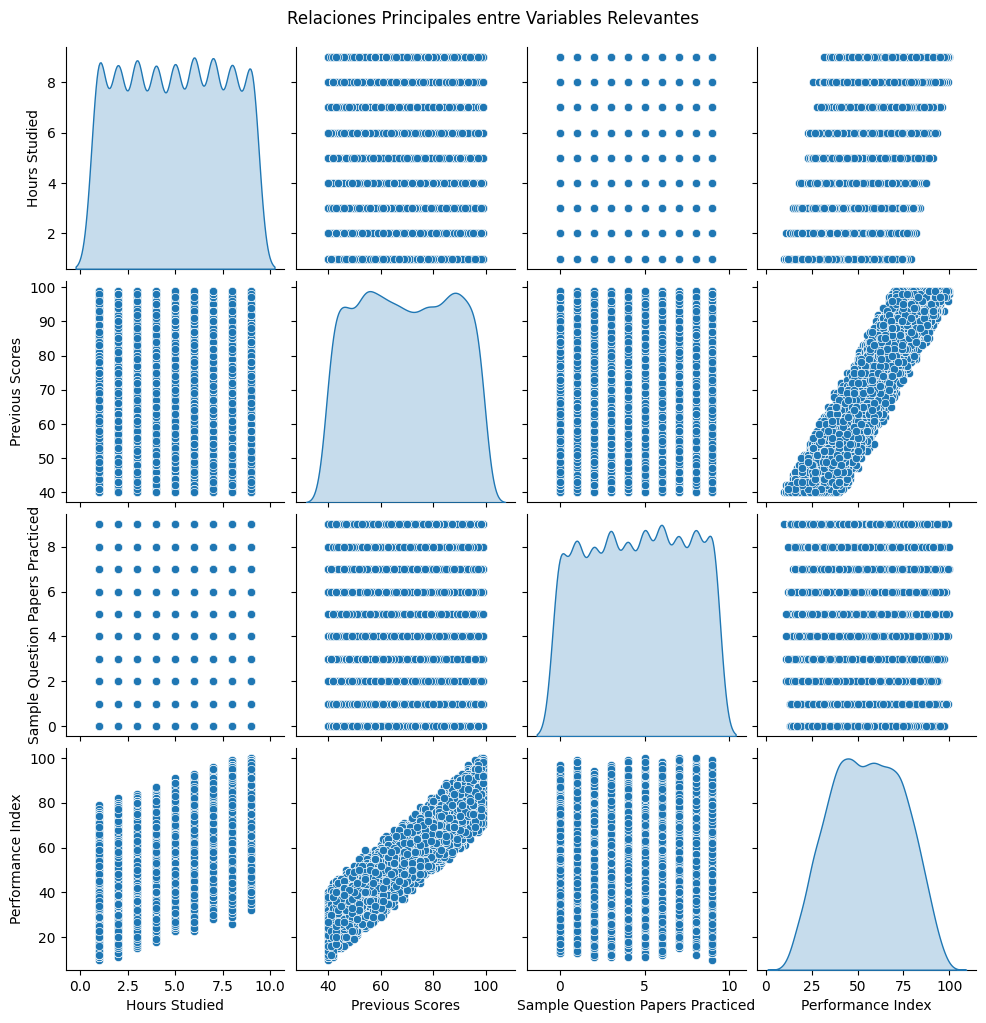

In [11]:
selected_vars = ['Hours Studied', 'Previous Scores', 'Sample Question Papers Practiced', 'Performance Index'] #Selección de las variables más relevantes para relaizar el mismo análisis
sns.pairplot(df[selected_vars], kind='scatter', diag_kind='kde', palette="pastel")
plt.suptitle("Relaciones Principales entre Variables Relevantes", y=1.02)
plt.show()

En esta matriz de dispersión, observamos cómo se relacionan entre sí variables clave como las horas de estudio, puntajes previos, exámenes de práctica, y el índice de rendimiento (Performance Index). La relación más fuerte se da entre los puntajes previos y el rendimiento, con una clara tendencia lineal que muestra que a mayores puntajes previos, mejor es el Performance Index. Las horas de estudio también muestran una relación positiva con el rendimiento, aunque menos pronunciada. Por otro lado, los exámenes de práctica y las otras variables no parecen tener una conexión tan clara entre sí o con el rendimiento, mostrando una dispersión más uniforme en sus valores.

## Prueba de hipotesis chi-cuadrado

In [12]:
df['Previous Score Group'] = pd.cut(df['Previous Scores'], bins=[0, 50, 75, 100], labels=['Bajo', 'Medio', 'Alto']) # Creamos los grupos de rangos para 'Previous Scores'
contingency_table = pd.crosstab(df['Previous Score Group'], df['Extracurricular Activities']) #Creamos una tabla de contingencia entre 'Previous Score Group' y 'Extracurricular Activities'

#Realizamos la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2_results = {
    "Chi-cuadrado": [chi2],
    "p-valor": [p],
    "Grados de libertad": [dof]
}
print(tabulate(chi2_results, headers="keys", tablefmt="fancy_grid"))

╒════════════════╤═══════════╤══════════════════════╕
│   Chi-cuadrado │   p-valor │   Grados de libertad │
╞════════════════╪═══════════╪══════════════════════╡
│        1.76679 │  0.413377 │                    2 │
╘════════════════╧═══════════╧══════════════════════╛


En este análisis de asociación entre el grupo de puntaje previo y la participación en actividades extracurriculares, el valor de Chi-cuadrado es 1.77 con un p-valor de 0.41, lo que muestra que no existe una relación estadísticamente significativa entre estos dos factores. El diagrama de mosaico muestra cómo se distribuyen los estudiantes según su grupo de puntaje (Bajo, Medio, Alto) y su participación en actividades extracurriculares. Visualmente, las proporciones en cada combinación de categorías son bastante similares, lo cual es consistente con los resultados de la prueba estadística, que confirma la independencia entre el grupo de puntaje previo y la participación en actividades extracurriculares en este conjunto de datos.

## Prueba de hipotesis t-student

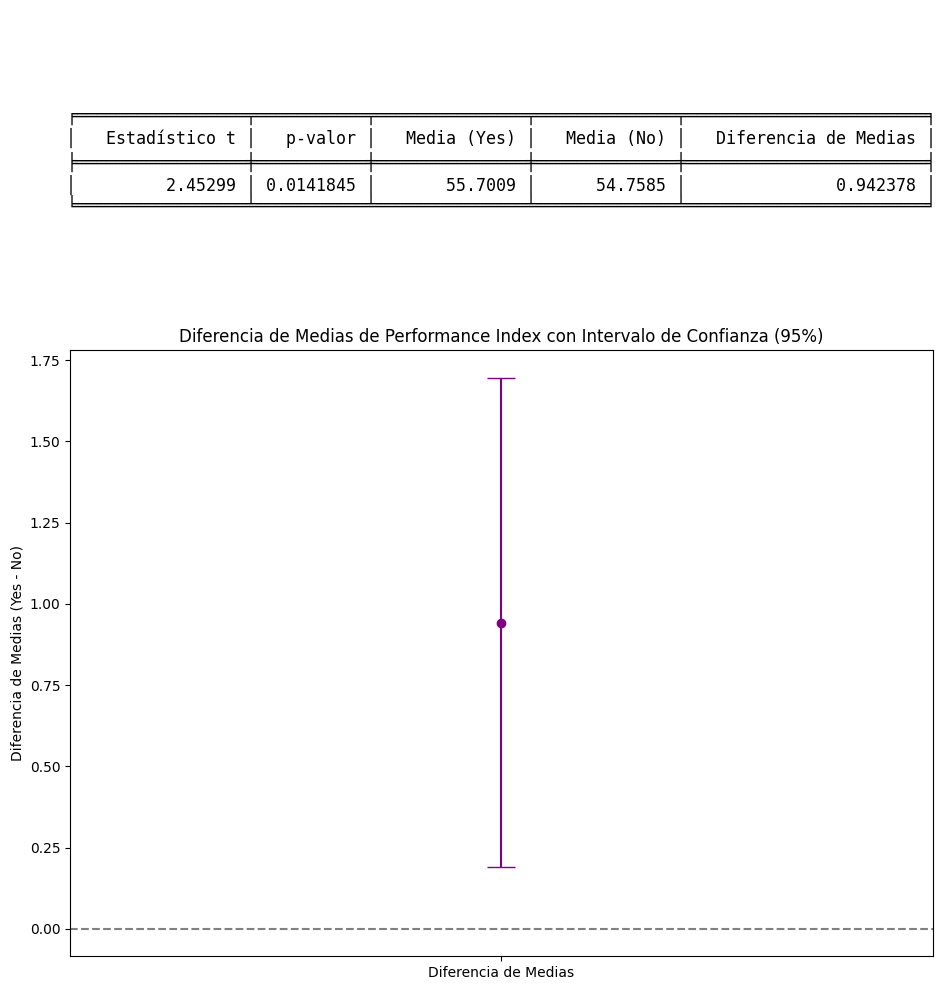

In [13]:
#Dividmos los datos en dos grupos
group_yes = df[df['Extracurricular Activities'] == 'Yes']['Performance Index']
group_no = df[df['Extracurricular Activities'] == 'No']['Performance Index']

#rEALIMAOS la prueba T de Student
t_stat, p_val = ttest_ind(group_yes, group_no)

t_test_results = {
    "Estadístico t": [t_stat],
    "p-valor": [p_val],
    "Media (Yes)": [group_yes.mean()],
    "Media (No)": [group_no.mean()],
    "Diferencia de Medias": [group_yes.mean() - group_no.mean()]
}
t_test_table = tabulate(t_test_results, headers="keys", tablefmt="fancy_grid")

confidence_level = 0.95
degrees_freedom = len(group_yes) + len(group_no) - 2
mean_diff = group_yes.mean() - group_no.mean()
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, loc=mean_diff,
                                       scale=np.sqrt(stats.sem(group_yes) ** 2 + stats.sem(group_no) ** 2))

fig, ax = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [1, 2]})

ax[0].axis('off')
ax[0].text(0.5, 0.5, t_test_table, ha='center', va='center', fontsize=12, fontfamily="monospace")


ax[1].errorbar(['Diferencia de Medias'], [mean_diff],
               yerr=[[mean_diff - confidence_interval[0]], [confidence_interval[1] - mean_diff]],
               fmt='o', color='purple', capsize=10)
ax[1].axhline(0, color='gray', linestyle='--')
ax[1].set_title("Diferencia de Medias de Performance Index con Intervalo de Confianza (95%)")
ax[1].set_ylabel("Diferencia de Medias (Yes - No)")

plt.tight_layout()
plt.show()